In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [4]:
df = pd.read_csv("../data/cleaned/US_Accidents_cleaned_sample_milestone1.csv")
df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
print("WEEK 5: GEOSPATIAL & LOCATION-BASED ANALYSIS")

WEEK 5: GEOSPATIAL & LOCATION-BASED ANALYSIS


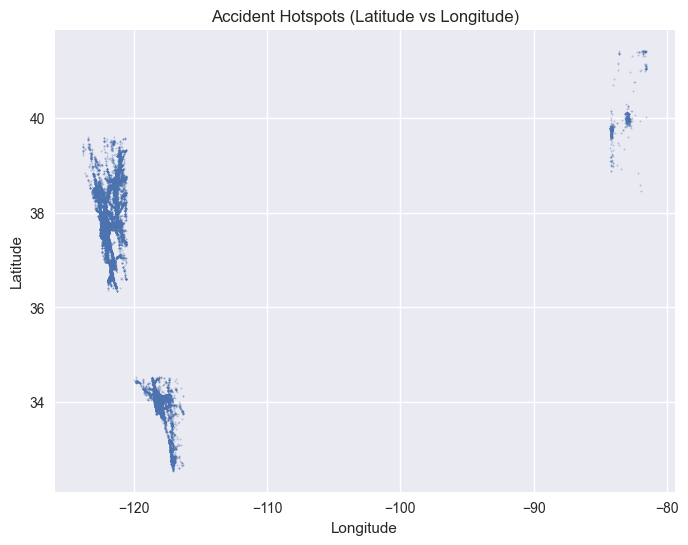

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(df["Start_Lng"], df["Start_Lat"], 
            s=1, alpha=0.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Accident Hotspots (Latitude vs Longitude)")
plt.show()


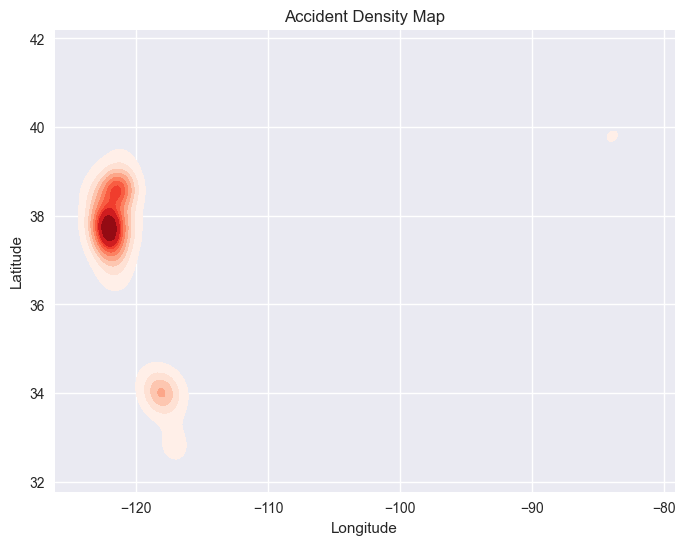

In [7]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    x=df["Start_Lng"],
    y=df["Start_Lat"],
    cmap="Reds",
    fill=True,
    thresh=0.05
)
plt.title("Accident Density Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [8]:
top_states = df["State"].value_counts().head(5)
top_states


State
CA    49272
OH      726
WV        2
Name: count, dtype: int64

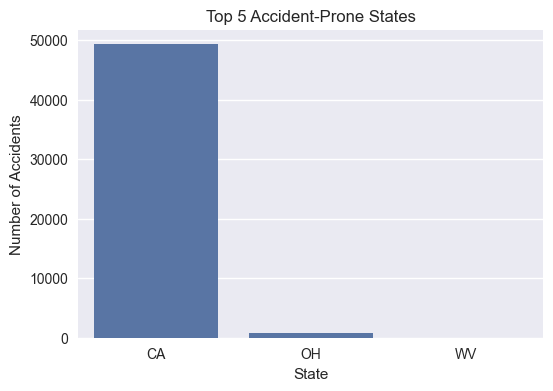

In [9]:
plt.figure(figsize=(6,4))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title("Top 5 Accident-Prone States")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.show()

In [10]:
top_cities = df["City"].value_counts().head(5)
top_cities


City
Sacramento       5223
San Jose         3026
Oakland          1802
Los Angeles      1300
San Francisco    1287
Name: count, dtype: int64

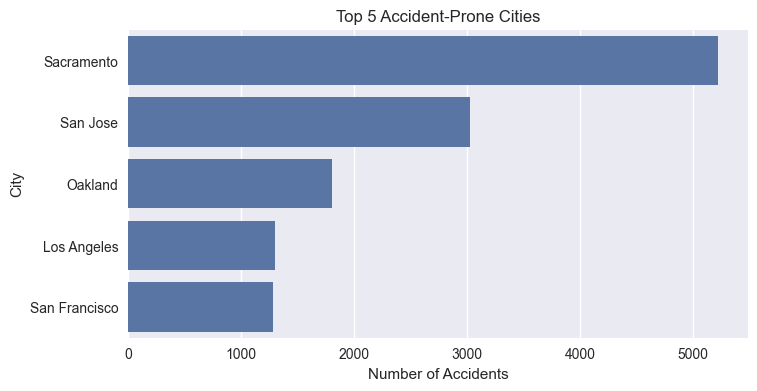

In [11]:
plt.figure(figsize=(8,4))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 5 Accident-Prone Cities")
plt.xlabel("Number of Accidents")
plt.ylabel("City")
plt.show()


In [12]:
print("WEEK 6: INSIGHT EXTRACTION & HYPOTHESIS TESTING")

WEEK 6: INSIGHT EXTRACTION & HYPOTHESIS TESTING


In [13]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df["Hour"] = df["Start_Time"].dt.hour


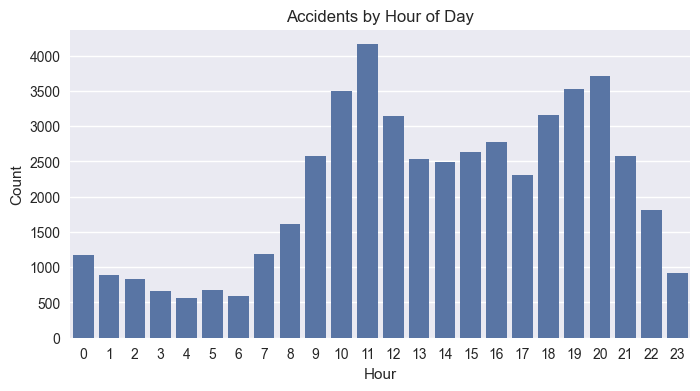

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(x="Hour", data=df)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

In [15]:
weather_filter = df["Weather_Condition"].str.contains(
    "Rain|Fog", case=False, na=False
)

weather_df = df[weather_filter]


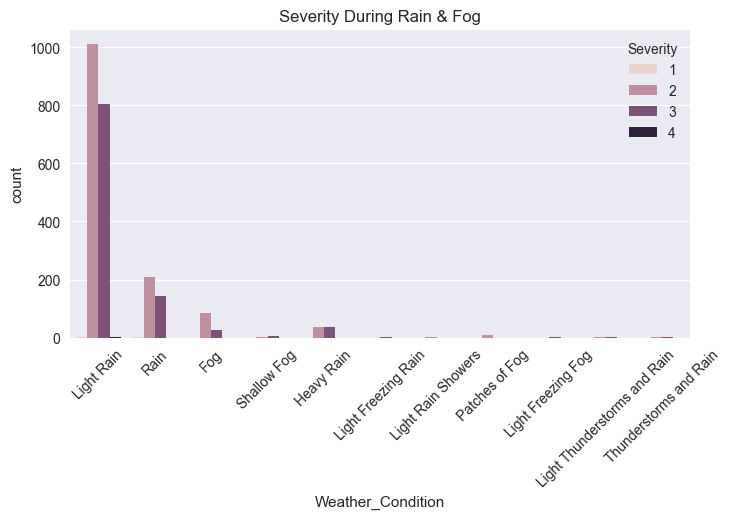

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(
    x="Weather_Condition",
    hue="Severity",
    data=weather_df
)
plt.xticks(rotation=45)
plt.title("Severity During Rain & Fog")
plt.show()


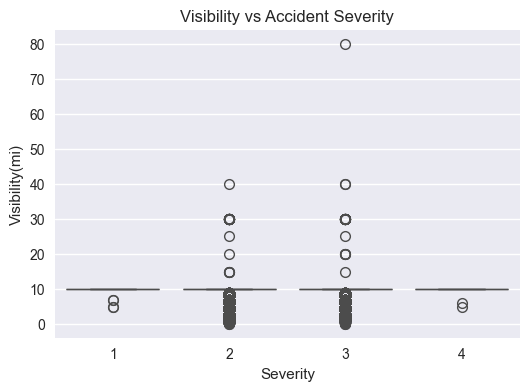

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x="Severity",
    y="Visibility(mi)",
    data=df
)
plt.title("Visibility vs Accident Severity")
plt.show()


In [18]:
df[["Visibility(mi)", "Severity"]].corr()


,Visibility(mi),Severity
Visibility(mi),1.000000,0.033996
Severity,0.033996,1.000000


In [19]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(df["Visibility(mi)"], df["Severity"])
corr, p_value


(nan, nan)